# Домашняя работа №3 (Курс "Advanced Python", 2 семестр)
## ФИО: 

# Свои комментарии обозначаю двумя решетками (##)

**Тема:** Машинное обучение  
**Выдана:** 12 апреля  
**Мягкий дедлайн:** 19 апреля  
**Жесткий дедлайн:** 24 апреля

#### Данное задание идет с весом 1.5! Т.е за эту работу можно получить максимум 10 * 1.5 = 15 баллов!

**Правила:**
Результат выполнения задания - отчет в формате Jupyter Notebook с кодом и выводами. В ходе выполнения задания требуется реализовать все необходимые алгоритмы, провести эксперименты и ответить на поставленные вопросы. Дополнительные выводы приветствуются. Чем меньше кода и больше комментариев - тем лучше.

Все ячейки должны быть "выполненными", при этом результат должен воспроизвдиться при проверке.

Задание выполняется самостоятельно. **Если вы нашли в Интернете какой-то код, который собираетесь заимствовать, обязательно укажите это в задании.** Если вы советовались с товарищем и/или позаимствовали его решение, обязательно укажите об этом в отчете. Нет ничего плохого в том, что вы пытаетесь разобраться и помогаете друг другу; плохо - когда вы скрываете это и выдаете чужие заслуги за свои. При обнаружении списывания ВСЕМ студентам, имеющим одинаковые списанные решения будет выставлен ОТРИЦАТЕЛЬНЫЙ балл (т.е если задача стоит 4 балла, вы получите не 0, а -4), "оригинал" искаться не будет

Задание, сданное после жесткого дедлайна, не принимается.

Автор задания: Павел Плюснин

# MNIST (10 баллов)
Давайте посмотрим на еще один классический датасет. В нем необходимо классифицировать цифры на изображении

In [61]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
#эта команда может выполняться несколько минут
mnist = fetch_openml('mnist_784', version=1)

In [63]:
## приводим данные к ndarray
mnist_data = mnist.data.to_numpy()
mnist_targ = mnist.target.to_numpy().astype(int)

In [64]:
print("Размерность данных" , mnist_data.shape)

Размерность данных (70000, 784)


Каждое изображение представляет собой матрицу 28*28 (вектор из 784 значений)

In [65]:
mnist_data[0].reshape((28,28)) #вектор представил в виде матрицы 28*28

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [66]:
#Изображенные цифры (метки классов) содержатся в 
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

**Пункт 0 (0.2 балла)**: разделите данные на обучающую и тестовую выборку. На тест оставьте 10% данных

In [76]:
from sklearn.model_selection import train_test_split

X_full, X_test, y_full, y_test = train_test_split(mnist_data, mnist_targ, train_size=0.9)

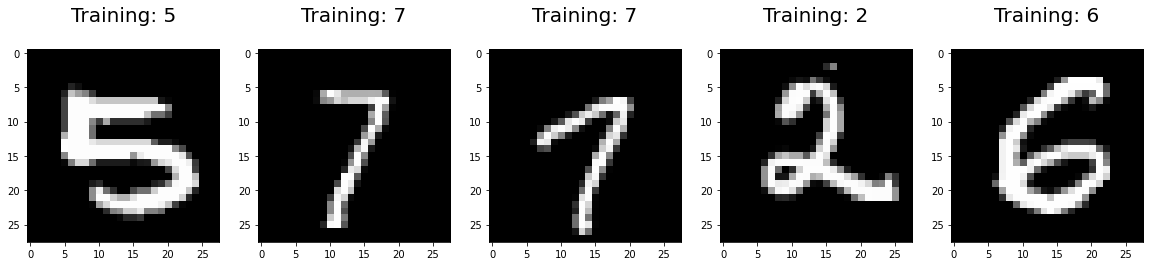

In [77]:
# Посмотрим, как выглядят наши цифры


plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)

In [78]:
y_train[0:5]

array([5, 7, 7, 2, 6])

# Модели без предобработки

**Пункт 1.1 (1 балл):** Постройте 3 линейные модели на изображениях как есть (используйте все 784 признака без предобработки). Постройте Логистическую регрессию, а также линейную модель с L2(ridge) и L1(lasso) регуляризаторами. Как долго учились модели? 

**За каждое отсутствие ответа на текстовые вопросы (в том числе за пункты, без проставления баллов) - минус пол балла**

In [108]:
X = X_full[0:2000] ## мой компьютер не вытягивает большой датасет
y = y_full[0:2000]

In [109]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso

In [123]:
%%time
regr = LogisticRegression(max_iter=1000).fit(X, y)

CPU times: user 20.9 s, sys: 12.1 s, total: 33 s
Wall time: 4.94 s


In [111]:
%%time
ridg = RidgeClassifier(max_iter=1000).fit(X, y)

CPU times: user 607 ms, sys: 593 ms, total: 1.2 s
Wall time: 193 ms


In [112]:
%%time
lass = Lasso(max_iter=1000).fit(X, y)

CPU times: user 854 ms, sys: 677 ms, total: 1.53 s
Wall time: 223 ms


In [116]:
print(y_test[0:20])
print(regr.predict(X_test[0:20]))
print(ridg.predict(X_test[0:20]))
print(np.round(lass.predict(X_test[0:20])).astype(int))

[8 0 6 0 3 0 6 7 9 9 6 1 4 0 5 6 6 3 4 8]
[8 0 6 0 1 0 5 7 9 9 6 1 4 8 5 6 6 5 4 8]
[8 0 6 0 1 0 4 7 9 9 6 1 9 6 5 6 6 3 4 5]
[ 7  1  4  0  1 -1  2  6  7  7  7  3  9  7  5  6  4  3  6  5]


**Пункт 1.2 (3 балла):** Постройте kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели (вам может помочь поиск по сетке)

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [124]:
%%time
kNN = KNeighborsClassifier().fit(X, y)

CPU times: user 2.58 ms, sys: 991 µs, total: 3.57 ms
Wall time: 2.42 ms


In [125]:
%%time
rfor = RandomForestClassifier().fit(X, y)

CPU times: user 1.42 s, sys: 881 µs, total: 1.42 s
Wall time: 1.42 s


In [126]:
%%time
grad = GradientBoostingClassifier().fit(X, y)

CPU times: user 1min 29s, sys: 482 ms, total: 1min 30s
Wall time: 1min 30s


**Пункт 2.1:**Как вы думаете, можно ли для данной задачи в качестве метрики качества использовать Accuracy? Обоснуйте свой ответ

Да, так как нам интересна именно доля правильных ответов. Для чисто линейных методов это не подходит, так как они как правило дают в ответе нецелое число.

**Пункт 2.2:** в любом случае, посмотрите на Accuracy для ваших моделей. Какая из них отработала лучше всего? Как вы думаете, почему?

In [129]:
from sklearn.metrics import accuracy_score

print("LogisticRegression accuracy: ", accuracy_score(y_test, regr.predict(X_test)))
print("RidgeCLassifier accuracy: ", accuracy_score(y_test, ridg.predict(X_test)))
print("Lasso accuracy: ", accuracy_score(y_test, np.round(lass.predict(X_test))))

LogisticRegression accuracy:  0.8657142857142858
RidgeCLassifier accuracy:  0.772
Lasso accuracy:  0.2102857142857143


In [128]:
print("kNeighborsClassifier accuracy: ", accuracy_score(y_test, kNN.predict(X_test)))
print("RandomForestClassifier accuracy: ", accuracy_score(y_test, rfor.predict(X_test)))
print("GradientBoostingClassifier accuracy: ", accuracy_score(y_test, grad.predict(X_test)))

kNeighborsClassifier accuracy:  0.9064285714285715
RandomForestClassifier accuracy:  0.912
GradientBoostingClassifier accuracy:  0.8881428571428571


**Пункт 2.3 (0.2 балла)**: получите confusion матицы ваших классификаторов

In [133]:
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, regr.predict(X_test), normalize='true')

Text(0.5, 103.73999999999997, 'Predicted label')

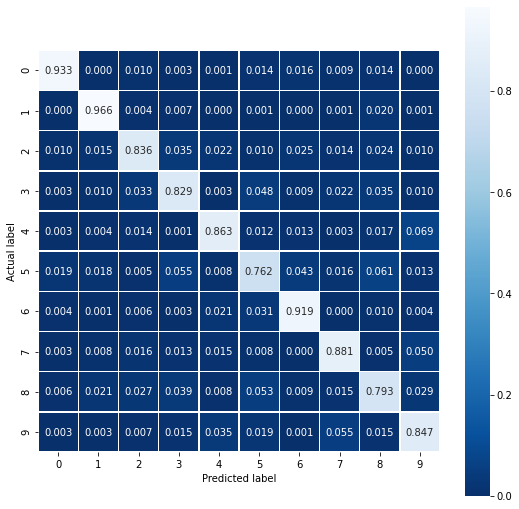

In [134]:
#построим красивую визуализацию
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Понижаем размерность

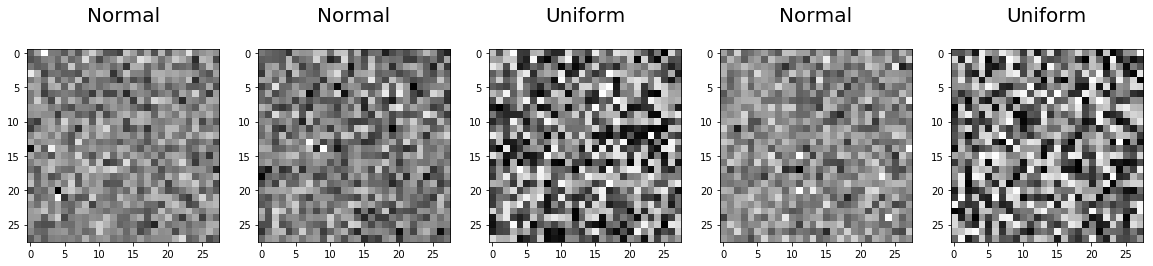

In [73]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    #сгенерируем из равномерного или нормального распределений
    is_normal = np.random.randint(0,2)
    if is_normal:
        image = np.random.randn(784)
    else:
        image = np.random.randint(0, 255, 784)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    
    label = "Normal" if is_normal else "Uniform"
    plt.title('%s\n' % label, fontsize = 20)

Заметим, что наши изображения далеки от случайного шума, т.е наши данные явно имеют размерность ниже, чем 784

**Пункт 3.1:** используя t-SNE, постройте визуализацию объектов на плоскости (чтобы все отрисовалось быстрее, стройте не на всей выборке, а только на 2000 элементах). Насколько хорошо выделились классы?

### В пунктах 3 и 4 работаем только с подвыборкой размера 2000!

In [148]:
from sklearn.manifold import TSNE

In [158]:
%%time
tsne_representation = TSNE().fit_transform(X, y)

CPU times: user 52.3 s, sys: 624 ms, total: 52.9 s
Wall time: 7.45 s


In [153]:
import pandas as pd
#Чтобы визуализация была корректной, вы должны были трансформировать X_train[:2000]
tsne_repr = pd.DataFrame()
tsne_repr['tsne-2d-one'] = tsne_representation[:,0]
tsne_repr['tsne-2d-two'] = tsne_representation[:,1]
tsne_repr["y"] = y[:2000]

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

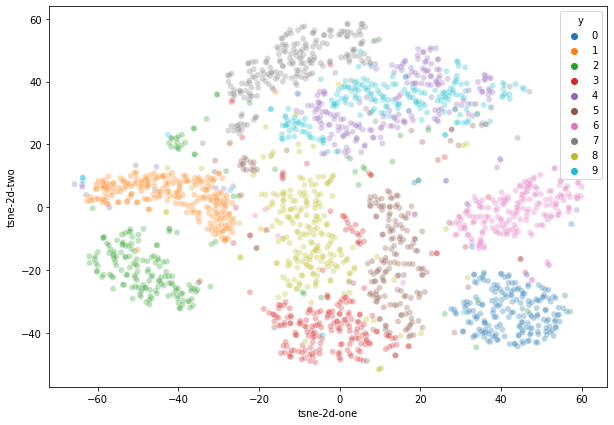

In [157]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("tab10", 10),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

**Пункт 3.2 (за пункты 3.1+3.2 = 0.8 баллов)**: для сравнения постройте на тех же данных такую же визуализацию, используя метод главных компонент. Сравните две визуализации (по скорости построения, а также по качеству кластеризации)

In [160]:
from sklearn.decomposition import PCA

In [163]:
%%time
pca_representation = PCA(n_components=2).fit_transform(X, y)

CPU times: user 508 ms, sys: 635 ms, total: 1.14 s
Wall time: 200 ms


<AxesSubplot:xlabel='pca-2d-one', ylabel='pca-2d-two'>

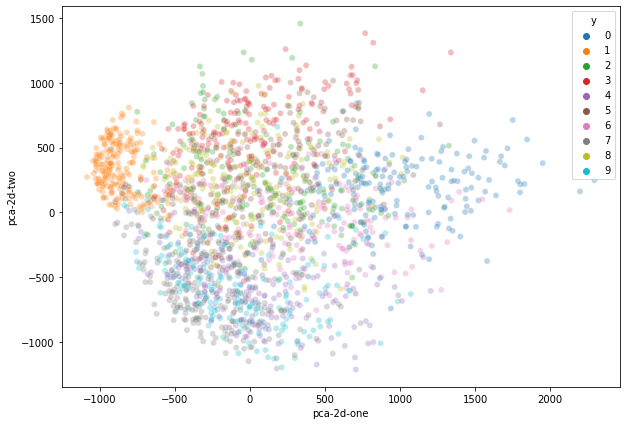

In [164]:
pca_repr = pd.DataFrame()
pca_repr['pca-2d-one'] = pca_representation[:,0]
pca_repr['pca-2d-two'] = pca_representation[:,1]
pca_repr["y"] = y[:2000]

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="pca-2d-one", y="pca-2d-two",
    hue="y",
    palette=sns.color_palette("tab10", 10),
    data=pca_repr,
    legend="full",
    alpha=0.3
)

## Итог: PCA быстрее, но дает плохое качество кластеризации

# Кластеризация
Давайте временно отвлечемся на данные tsne_repr, полученные применением t-SNE к 2000 объектам train данных

In [165]:
tsne_repr.head()

,tsne-2d-one,tsne-2d-two,y
0,47.224045,-40.545139,0
1,-42.769451,4.897733,1
2,40.031815,-3.651621,6
3,31.259346,-1.798033,6
4,-63.865360,7.189597,4


**Пункт 4.1: (1 балл)** Давайте посмотрим на работу алгоритма DBSCAN (не передавайте метку класса y!). Зафиксируем минимальное количество объектов в корневой точке - 55. Подберите радиус окрестности (может быть дробным), чтобы dbscan выделил ровно 10 классов (включая класс выбросов "-1"), но так, чтобы в каждом классе (в шумовом в том числе) было не более 400 объектов. Последнее ограничение введено затем, чтобы большинство объектов не попало в один большой кластер, а остальные кластера оказались незначительно мелкими

In [278]:
from sklearn.cluster import DBSCAN

dbscan_repr = DBSCAN(min_samples=55, eps=7.37).fit_predict(tsne_representation)
print(np.unique(dbscan_repr, return_counts=True))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8]), array([571, 251, 175, 192, 336,  89, 161, 111,  74,  40]))


**Посмотрите на визуализацию точек выше, насколько адекватно был выбран радиус окрестности?**

Посмотрим, насклько качественно отработал DBSCAN

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

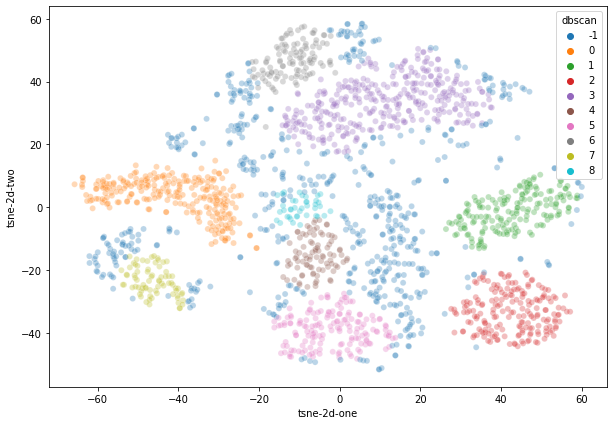

In [280]:
tsne_repr["dbscan"] = dbscan_repr

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="dbscan",
    palette=sns.color_palette("tab10"),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

**Пункт 5.1 (1 балл)**. Вернитесь ко всей выборке. Пользуясь критерием крутого спуска найдите характерную размерность данных.   
**Пункт 5.2 (1 балл)** Во время поиска эффективной размерности, ужимайте Train и test выборку до текущей раземрности и стройте понравивщуюся линейную модель на train данных, записывайте метрику качества на тестовых данных. Постройте график зависимости качества от размерности. Верно ли, что с качеством наблюдается такая же тенденция, что и с сохраненной дисперсией? Наблюдается ли крутой спуск/подъем? Если да, то происходит ли он на эффективном значении расзмерноти (где наблюдается крутой спуск потерянной дисперсии)?

In [545]:
#ваш код, графики и выводы здесь

# Строим модели на данных меньшей размерности
Понизьте размерность данных до эффективной размерности (помните, что это не то значение, на котором происходит резкий спуск, а следующее)

**Пункт 6.1 (0.9 баллов)** Постройте линейные модели, kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели. Сравните качества с достигнутыми качествами до понижения размерности. Сделайте выводы.

In [546]:
#ваш код здесь

**Пункт 6.2 (0.9 баллов)** Отнормируйте признаки используя StandardScaler. Постройте те же типы моделей, что и в предыдущем пункте, подберите оптимальные гиперпараметры. Сравните метрики качества, сделайте выводы

In [ ]:
#ваш код здесь